In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")
print(os.getcwd())

/mnt/raid/bling/bram/multilang_timescale


In [4]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from src.utils.plot import config_plotting, figsize_dict, id_to_label

In [5]:
image_dir = ".temp/image"
timescale_selectivity_dir = os.path.join(image_dir,  "timescale_selectivity")
crop_ratio = 0.85

In [6]:
subjects_ids = ['COL', 'GFW', 'TYE']

In [7]:
config_plotting('paper')

In [8]:
images = {}
for subject_id in subjects_ids:
    images[subject_id] = {}

    images[subject_id]["en"] = plt.imread(
        os.path.join(timescale_selectivity_dir, f"{subject_id}", "en_flatmap.png")
    )
    images[subject_id]["zh"] = plt.imread(
        os.path.join(timescale_selectivity_dir, f"{subject_id}", "zh_flatmap.png")
    )
    images[subject_id]["diff"] = plt.imread(
        os.path.join(timescale_selectivity_dir, f"{subject_id}", "diff_flatmap.png")
    )

    # do cropping
    for key in images[subject_id].keys():
        images[subject_id][key] = images[subject_id][key][
            int(images[subject_id][key].shape[0] * (1 - crop_ratio)) : int(
                images[subject_id][key].shape[0] * crop_ratio
            ),
          :
        ]

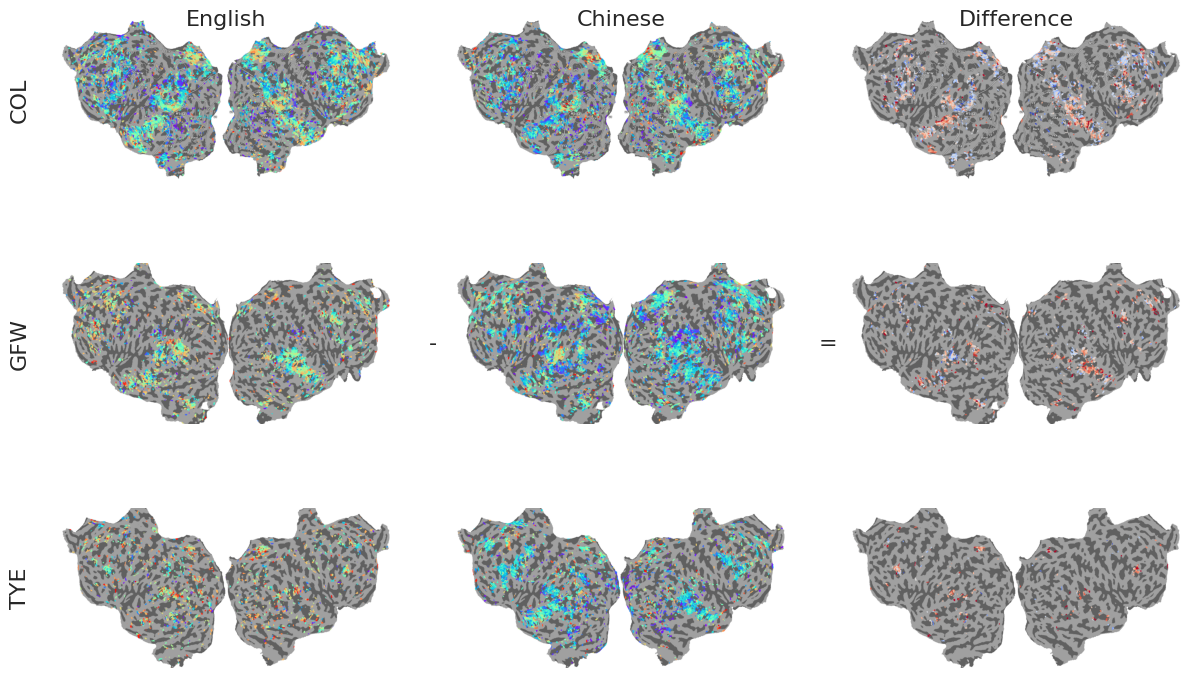

In [9]:
# create plots using gridspec and subplots
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=figsize_dict['double'])

gs = GridSpec(3, 3, figure=fig, width_ratios=[1,  1,  1],)# COL 
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(images['COL']['en'])
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(images['COL']['zh'])
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(images['COL']['diff'])
ax3.axis('off')

# GFW
ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(images['GFW']['en'])
ax4.axis('off')

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(images['GFW']['zh'])
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(images['GFW']['diff'])
ax6.axis('off')

# TYE
ax7 = fig.add_subplot(gs[2, 0])
ax7.imshow(images['TYE']['en'])
ax7.axis('off')

ax8 = fig.add_subplot(gs[2, 1])
ax8.imshow(images['TYE']['zh'])
ax8.axis('off')

ax9 = fig.add_subplot(gs[2, 2])
ax9.imshow(images['TYE']['diff'])
ax9.axis('off')

# Texts
## languages
ax1.text(0.5, 1, 'English', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16)
ax2.text(0.5, 1, 'Chinese', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=16)
ax3.text(0.5, 1, 'Difference', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=16)

## subjects
ax1.text(-0.1, 0.5, 'COL', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=16, rotation=90)
ax4.text(-0.1, 0.5, 'GFW', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=16, rotation=90)
ax7.text(-0.1, 0.5, 'TYE', horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes, fontsize=16, rotation=90)


## "-" and "=" symbol
ax4.text(1.1, 0.5, '-', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=16)
ax5.text(1.1, 0.5, '=', horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes, fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
# get default font size
default_font_size = plt.rcParams['font.size']

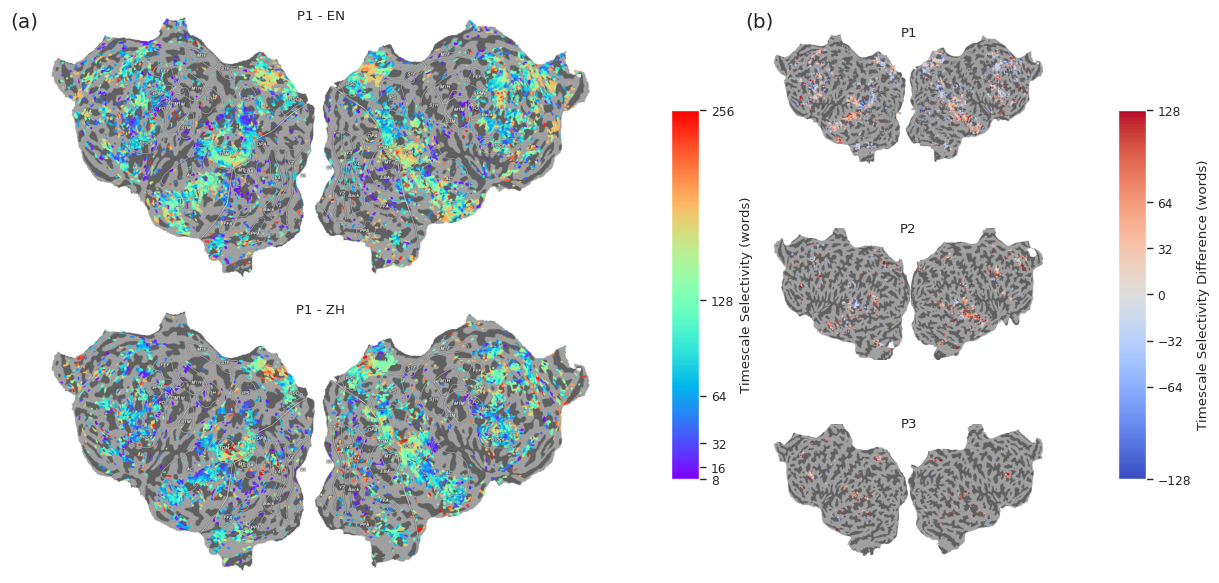

In [19]:
# alternative plot

fig = plt.figure(figsize=(12,6))

gs = GridSpec(6, 4, figure=fig, width_ratios=[2, 0.1, 1.0, 0.1])

# column one only for COL EN and ZH
ax1 = fig.add_subplot(gs[:3, 0])
ax1.imshow(images["COL"]["en"])
ax1.axis("off")
ax1.text(
    0.5,
    1,
    f'{id_to_label["COL"]} - EN',
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)

ax2 = fig.add_subplot(gs[3:, 0])
ax2.imshow(images["COL"]["zh"])
ax2.axis("off")
ax2.text(
    0.5,
    1,
    f'{id_to_label["COL"]} - ZH',
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
# colt 2 for diff of COL GFW and TYE

ax3 = fig.add_subplot(gs[0:2, 2])
ax3.imshow(images["COL"]["diff"])
ax3.axis("off")
ax3.text(
    0.5,
    1,
    id_to_label["COL"],
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax3.transAxes,
)

ax4 = fig.add_subplot(gs[2:4, 2])
ax4.imshow(images["GFW"]["diff"])
ax4.axis("off")
ax4.text(
    0.5,
    1,
    id_to_label["GFW"],
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax4.transAxes,
)

ax5 = fig.add_subplot(gs[4:6, 2])
ax5.imshow(images["TYE"]["diff"])
ax5.axis("off")
ax5.text(
    0.5,
    1,
    id_to_label["TYE"],
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax5.transAxes,
)

# add horizontal colorbar at the bottom of the plot
cbar_ax1 = fig.add_subplot(gs[1:5, 1])

## add 8-256 rainbow colorbar at the bottom of the plot
cmap = plt.cm.rainbow
norm = plt.Normalize(vmin=8, vmax=256)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, cax=cbar_ax1, orientation="vertical")
## color bar ticks to 8,16,32,64,128,256
cbar_ax1.set_yticks([8, 16, 32, 64, 128, 256])
## cbar label
cbar_ax1.set_ylabel("Timescale Selectivity (words)")

# second colorbar for difference
cbar_ax2 = fig.add_subplot(gs[1:5, 3])

## add 8-256 rainbow colorbar at the bottom of the plot
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(vmin=-128, vmax=128)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, cax=cbar_ax2, orientation="vertical")
## color bar ticks to 8,16,32,64,128,256
cbar_ax2.set_yticks([-128, -64, -32, 0, 32, 64, 128])
cbar_ax2.set_ylabel("Timescale Selectivity Difference (words)")


fig.text(
    0.0,
    0.95,
    "(a)",
    ha="center",
    va="center",
    fontsize=default_font_size * 1.5,
    transform=fig.transFigure,
)
fig.text(
    0.6125,
    0.95,
    "(b)",
    ha="center",
    va="center",
    fontsize=default_font_size * 1.5,
    transform=fig.transFigure,
)

plt.tight_layout()
plt.savefig(
    os.path.join(timescale_selectivity_dir, "timescale_selectivity_agg.png"), dpi=300
)
plt.show()

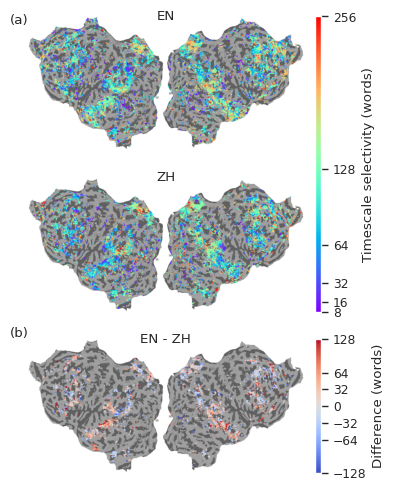

In [49]:
# alternative plot

fig = plt.figure(figsize=(4, 5))

gs = GridSpec(3, 2, figure=fig, width_ratios=[1, 0.02,], height_ratios=[1, 1, 1])

# column one only for COL EN and ZH
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(images["COL"]["en"])
ax1.axis("off")
ax1.text(
    0.5,
    1,
    f'EN',
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(images["COL"]["zh"])
ax2.axis("off")
ax2.text(
    0.5,
    1,
    f'ZH',
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
# colt 2 for diff of COL GFW and TYE

ax3 = fig.add_subplot(gs[2, 0])
ax3.imshow(images["COL"]["diff"])
ax3.axis("off")
ax3.text(
    0.5,
    1,
    "EN - ZH",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax3.transAxes,
)

# add horizontal colorbar at the bottom of the plot
cbar_ax1 = fig.add_subplot(gs[0:2, 1])

## add 8-256 rainbow colorbar at the bottom of the plot
cmap = plt.cm.rainbow
norm = plt.Normalize(vmin=8, vmax=256)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, cax=cbar_ax1, orientation="vertical", fraction=0.2)
## color bar ticks to 8,16,32,64,128,256
cbar_ax1.set_yticks([8, 16, 32, 64, 128, 256])
## cbar label
cbar_ax1.set_ylabel("Timescale selectivity (words)")

# second colorbar for difference
cbar_ax2 = fig.add_subplot(gs[2, 1])

## add 8-256 rainbow colorbar at the bottom of the plot
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(vmin=-128, vmax=128)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, cax=cbar_ax2, orientation="vertical", fraction=0.8)
## color bar ticks to 8,16,32,64,128,256
cbar_ax2.set_yticks([-128, -64, -32, 0, 32, 64, 128])
cbar_ax2.set_ylabel("Difference (words)")


fig.text(
    0.05,
    0.95,
    "(a)",
    ha="center",
    va="center",
    fontsize=default_font_size,
    transform=fig.transFigure,
)
fig.text(
    0.05,
    0.325,
    "(b)",
    ha="center",
    va="center",
    fontsize=default_font_size,
    transform=fig.transFigure,
)

plt.tight_layout()
plt.savefig(
    os.path.join(timescale_selectivity_dir, "timescale_selectivity_agg_col.png"), dpi=300
)
plt.show()